In [1]:
pip install numpy matplotlib Pillow

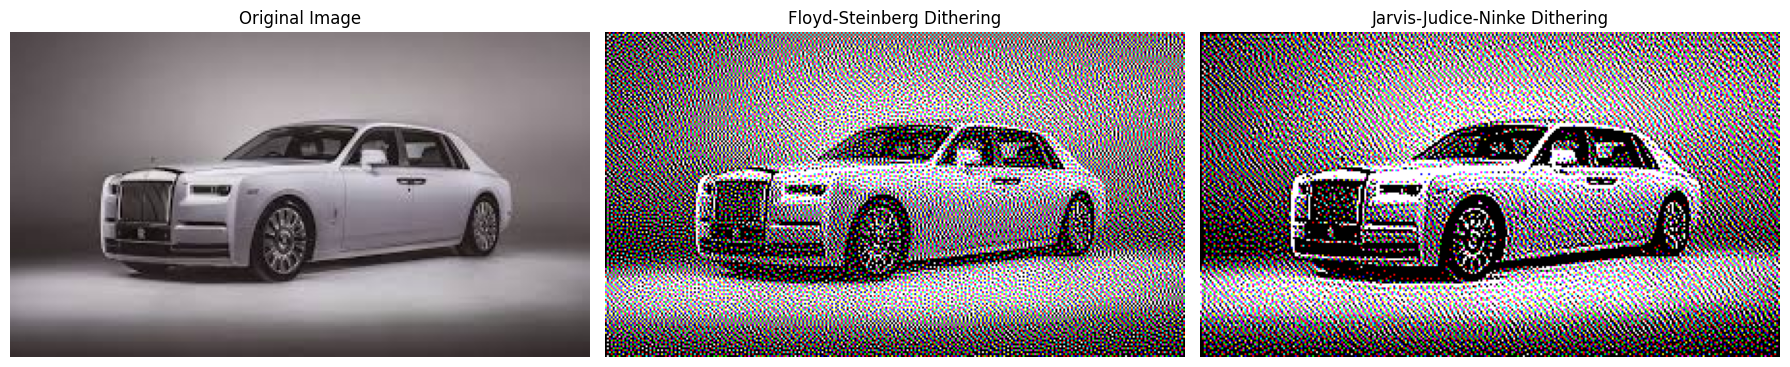

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def floyd_steinberg_dithering_color(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    pixels = np.array(image, dtype=np.float32)
    height, width, channels = pixels.shape
    dithered = np.zeros_like(pixels, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel > 127)
                dithered[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 16
                if y + 1 < height:
                    if x > 0:
                        pixels[y + 1, x - 1, c] += quant_error * 3 / 16
                    pixels[y + 1, x, c] += quant_error * 5 / 16
                    if x + 1 < width:
                        pixels[y + 1, x + 1, c] += quant_error * 1 / 16
    return Image.fromarray(dithered)
def jarvis_judice_ninke_dithering_color(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    pixels = np.array(image, dtype=np.float32)
    height, width, channels = pixels.shape
    dithered = np.zeros_like(pixels, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            for c in range(channels):
                old_pixel = pixels[y, x, c]
                new_pixel = 255 * (old_pixel > 127)
                dithered[y, x, c] = new_pixel
                quant_error = old_pixel - new_pixel
                if x + 1 < width:
                    pixels[y, x + 1, c] += quant_error * 7 / 48
                if x + 2 < width:
                    pixels[y, x + 2, c] += quant_error * 5 / 48
                if y + 1 < height:
                    if x - 1 >= 0:
                        pixels[y + 1, x - 1, c] += quant_error * 3 / 48
                    pixels[y + 1, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixels[y + 1, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixels[y + 1, x + 2, c] += quant_error * 1 / 48
                if y + 2 < height:
                    if x - 2 >= 0:
                        pixels[y + 2, x - 2, c] += quant_error * 1 / 48
                    if x - 1 >= 0:
                        pixels[y + 2, x - 1, c] += quant_error * 3 / 48
                    pixels[y + 2, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixels[y + 2, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixels[y + 2, x + 2, c] += quant_error * 1 / 48
    dithered = np.clip(dithered, 0, 255)

    return Image.fromarray(dithered.astype(np.uint8))
image_path = '/content/1.jpeg'
original_image = Image.open(image_path).convert('RGB')
floyd_steinberg_result = floyd_steinberg_dithering_color(original_image)
jarvis_judice_ninke_result = jarvis_judice_ninke_dithering_color(original_image)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(floyd_steinberg_result)
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(jarvis_judice_ninke_result)
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()


**Floyd-Steinberg** produces smoother gradients and sharper edges with fewer visible dithering artifacts. It's computationally faster due to its simpler error diffusion pattern, making it ideal for high-quality, efficient image processing.

**Jarvis-Judice-Ninke**, on the other hand, creates more pronounced dithering patterns with a grainier, textured appearance. It diffuses the error over a larger area, resulting in more uniform distribution but at the cost of processing speed and potentially blurring fine details.

Floyd-Steinberg is better for cleaner, efficient output, while JJN offers a more artistic, textured result at a higher computational cost